Começamos fazendo as importações necessárias para o trabalho.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy training and test data with an 80/20 split

Geramos dados de treinamento e teste com distribuição normal padrão (**np.random.randn**).

A variável alvo y é gerada com uma relação linear com x, mas com ruído aleatório para simular variações reais.

A equação verdadeira usada foi: y=2x+3+ru

In [10]:
np.random.seed(7654)  # deterministic random seed
xTrain = np.random.randn(80)
yTrain = 2 * xTrain + 3 + np.random.randn(80)

xTest = np.random.randn(20)
yTest = 2 * xTest + 3 + np.random.randn(20)

# Mathematical background for the implementation model definition in forward:
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo>=</mo>
  <mi>w</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
</math>

cost function: <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>C</mi>
  <mo stretchy="false">(</mo>
  <mi mathvariant="bold-italic">w</mi>
  <mo>,</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>m</mi>
      <mrow data-mjx-texclass="ORD">
        <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">D</mi>
      </mrow>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>m</mi>
        <mrow data-mjx-texclass="ORD">
          <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">D</mi>
        </mrow>
      </msub>
    </mrow>
  </munderover>
  <mo stretchy="false">(</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">~</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <mo stretchy="false">(</mo>
  <msup>
    <mi mathvariant="bold-italic">w</mi>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="sans-serif">T</mi>
    </mrow>
  </msup>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>x</mi>
        <mo stretchy="false">~</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mo>+</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
</math>
 

gradient of weights: <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>w</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>m</mi>
      <mrow data-mjx-texclass="ORD">
        <mrow data-mjx-texclass="ORD">
          <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">D</mi>
        </mrow>
      </mrow>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>m</mi>
        <mrow data-mjx-texclass="ORD">
          <mrow data-mjx-texclass="ORD">
            <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">D</mi>
          </mrow>
        </mrow>
      </msub>
    </mrow>
  </munderover>
  <mo>&#x2212;</mo>
  <mn>2</mn>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>x</mi>
        <mo stretchy="false">~</mo>
      </mover>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
    </mrow>
  </msub>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <msub>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>y</mi>
          <mo stretchy="false">~</mo>
        </mover>
      </mrow>
      <mrow data-mjx-texclass="ORD">
        <mi>i</mi>
      </mrow>
    </msub>
    <mo>&#x2212;</mo>
    <mo stretchy="false">(</mo>
    <mi>w</mi>
    <msub>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>x</mi>
          <mo stretchy="false">~</mo>
        </mover>
      </mrow>
      <mrow data-mjx-texclass="ORD">
        <mi>i</mi>
      </mrow>
    </msub>
    <mo>+</mo>
    <mi>b</mi>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>
 
 

gradient of biases: <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>b</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>m</mi>
      <mrow data-mjx-texclass="ORD">
        <mrow data-mjx-texclass="ORD">
          <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">D</mi>
        </mrow>
      </mrow>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>m</mi>
        <mrow data-mjx-texclass="ORD">
          <mrow data-mjx-texclass="ORD">
            <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">D</mi>
          </mrow>
        </mrow>
      </msub>
    </mrow>
  </munderover>
  <mo>&#x2212;</mo>
  <mn>2</mn>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <msub>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>y</mi>
          <mo stretchy="false">~</mo>
        </mover>
      </mrow>
      <mrow data-mjx-texclass="ORD">
        <mi>i</mi>
      </mrow>
    </msub>
    <mo>&#x2212;</mo>
    <mo stretchy="false">(</mo>
    <mi>w</mi>
    <msub>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>x</mi>
          <mo stretchy="false">~</mo>
        </mover>
      </mrow>
      <mrow data-mjx-texclass="ORD">
        <mi>i</mi>
      </mrow>
    </msub>
    <mo>+</mo>
    <mi>b</mi>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>
 
 

training update steps: <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
  <mo stretchy="false">&#x2190;</mo>
  <mi>w</mi>
  <mo>&#x2212;</mo>
  <mi>&#x3B1;</mi>
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>w</mi>
    </mrow>
  </mfrac>
  <mspace linebreak="newline"></mspace>
  <mi>b</mi>
  <mo stretchy="false">&#x2190;</mo>
  <mi>b</mi>
  <mo>&#x2212;</mo>
  <mi>&#x3B1;</mi>
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>b</mi>
    </mrow>
  </mfrac>
</math>



 
Criamos uma classe **LinearRegression** com dois parâmetros: **weight** (inclinação) e **bias** (intercepto). Inicializamos ambos com zero.

Essa função implementa a previsão do modelo, ou seja:ŷ=w⋅x+b

Calculamos o erro quadrático médio (MSE), a métrica usada para avaliar quão boa está a predição do modelo.

Derivamos a função de custo em relação a weight e bias

Atualizamos os parâmetros usando gradiente descendente com taxa de aprendizado lr.

A cada 10 épocas, imprimimos o custo no conjunto de treino e teste.

In [11]:
class LinearRegression:
    def __init__(self):
        self.weight = 0
        self.bias = 0

    def forward(self, x):
        y = self.weight * x + self.bias
        return y

    def costFunction(self, x, y):
        cost = np.mean((self.forward(x) - y) ** 2)
        return cost

    def gradient(self, x, y):
        gradientWeight = np.mean((2 * (self.forward(x) - y) * x))
        gradientBias = np.mean((2 * (self.forward(x) - y)))
        return gradientWeight, gradientBias

    def train(self, epochs, lr, xTrain, yTrain, xTest, yTest):
        for epoch in range(epochs):
            costTrain = self.costFunction(xTrain, yTrain)
            costTest = self.costFunction(xTest, yTest)

            # Update step
            gradientWeight, gradientBias = self.gradient(xTrain, yTrain)
            self.weight -= lr * gradientWeight
            self.bias -= lr * gradientBias

            if epoch % 10 == 0:
                string = "Epoch: {}/{}\t\tTraining cost = {:.2e}\t\tValidation cost = {:.2e}"
                print(string.format(epoch, epochs, costTrain, costTest))

# Model training

Treinamos o modelo por 101 épocas. O custo deve diminuir progressivamente se o gradiente estiver correto.

In [12]:
lr = 5e-2
epochs = 101

model = LinearRegression()
model.train(epochs, lr, xTrain, yTrain, xTest, yTest)

Epoch: 0/101		Training cost = 1.52e+01		Validation cost = 1.51e+01
Epoch: 10/101		Training cost = 2.51e+00		Validation cost = 2.15e+00
Epoch: 20/101		Training cost = 1.04e+00		Validation cost = 8.42e-01
Epoch: 30/101		Training cost = 8.76e-01		Validation cost = 7.52e-01
Epoch: 40/101		Training cost = 8.57e-01		Validation cost = 7.62e-01
Epoch: 50/101		Training cost = 8.55e-01		Validation cost = 7.70e-01
Epoch: 60/101		Training cost = 8.54e-01		Validation cost = 7.74e-01
Epoch: 70/101		Training cost = 8.54e-01		Validation cost = 7.75e-01
Epoch: 80/101		Training cost = 8.54e-01		Validation cost = 7.75e-01
Epoch: 90/101		Training cost = 8.54e-01		Validation cost = 7.76e-01
Epoch: 100/101		Training cost = 8.54e-01		Validation cost = 7.76e-01


# Visualize the prediction

Geramos a linha de regressão com x contínuo.

Plotamos:

- Pontos de treino (preto)
- Pontos de teste (vermelho)
- Linha predita pelo modelo (azul)

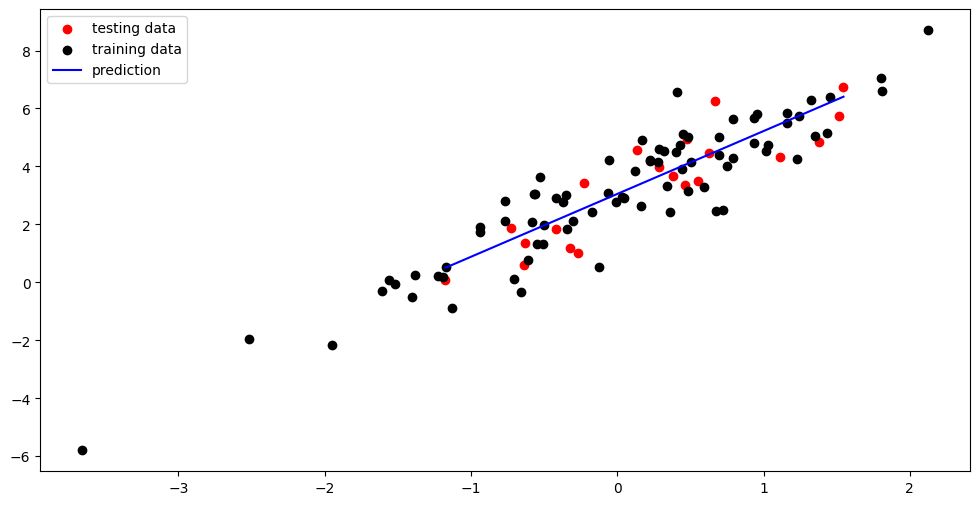

In [13]:
yTrainPred = model.forward(xTrain)  # not visualized
yTestPred = model.forward(xTest)  # not visualized

# Draw predictor between min and max x values of Testset
x = np.linspace(np.min(xTest), np.max(xTest), 100)
yPred = model.forward(x)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(xTest, yTest, color="r", label="testing data")
ax.scatter(xTrain, yTrain, color="k", label="training data")
ax.plot(x, yPred, "b", label="prediction")
ax.legend()
plt.show()

A equação normal da regressão linear é:
θ=(X^TX)^(−1)X^Ty
- X é a matriz de design (com coluna de 1s para o bias).
- θ contém [bias, weight].

In [14]:
# Compare learned model with normal equations 
print('Model Bias, b = ', model.bias)
print('Model Weight, w = ', model.weight)

# Compare with Normal equations approach
x = np.matrix(xTrain).T  # column vectors
y = np.matrix(yTrain).T
X = np.hstack([np.ones((x.shape[0], 1)), x])  # augment with 1s

theta = np.linalg.inv(X.T * X) * X.T * y

print("\nCompare with Normal equation weights (bias and slope):\n", theta)

Model Bias, b =  3.0512817185027297
Model Weight, w =  2.1695230642637213

Compare with Normal equation weights (bias and slope):
 [[3.05134874]
 [2.16954833]]


# Normal equations

Testamos a equação normal com dados sem ruído. Esperamos obter exatamente [3, 2] como pesos (bias e weight), pois os dados seguem exatamente a equação y = 2x + 3.

In [15]:
x = np.matrix(range(4)).T  # X and Y are column vectors by convention 
y = 2 * x + 3
print('x \n', x)
print('y \n', y)

# for multidimensional regression problems, X is (m, n)
#  with m rows for the data points and n columns for the features (dimensions) + 1
X = np.hstack([np.ones((x.shape[0], 1)), x])  # augment with 1s

X_transpose_X = X.T * X
X_transpose_y = X.T * y
theta = np.linalg.inv(X_transpose_X) * X_transpose_y

print("X.T * X:\n", X_transpose_X)
print("X.T * y:\n", X_transpose_y)

# Print the weights
print("Weights (bias and slope):\n", theta)

x 
 [[0]
 [1]
 [2]
 [3]]
y 
 [[3]
 [5]
 [7]
 [9]]
X.T * X:
 [[ 4.  6.]
 [ 6. 14.]]
X.T * y:
 [[24.]
 [46.]]
Weights (bias and slope):
 [[3.]
 [2.]]


In [16]:
x = np.matrix(xTrain).T
y = np.matrix(yTrain).T
X = np.hstack([np.ones((x.shape[0], 1)), x])  # augment with 1s

X_transpose_X = X.T * X
X_transpose_y = X.T * y
theta = np.linalg.inv(X_transpose_X) * X_transpose_y

# Print the weights
print("Weights (bias and slope):\n", theta)

Weights (bias and slope):
 [[3.05134874]
 [2.16954833]]
